In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load datasets and merge on by ID
survey_data = pd.read_csv('data/CSAT_Survey_Data.csv')
age_data = pd.read_csv('data/Customer_Age_Data.csv')
mrr_data = pd.read_csv('data/Customer_MRR_Data.csv')
revenue_data = pd.read_csv('data/Customer_Revenue_Data.csv')
ticket_data = pd.read_csv('data/Help_Ticket_Data.csv')
interaction_data = pd.read_csv('data/Newsletter_Interaction_Data.csv')
bugtask_data = pd.read_csv('data/Product_Bug_Task_Data.csv')
region_data = pd.read_csv('data/RegionAndVertical_Data.csv')
status_data = pd.read_csv('data/StatusAndLevel_Data.csv')

# change column name on age data
age_data.rename(columns={'CRM ID':'Customer ID','Customer Age (Months)':'Age'}, inplace=True)

#survey_data["order"] = survey_data.groupby("Customer ID").cumcount()
#bugtask_data["order"] = bugtask_data.groupby("Customer ID").cumcount()

# merge all datasets
df = pd.merge(survey_data, age_data, on='Customer ID',how='left')
print(df.shape)
df = pd.merge(df, mrr_data, on='Customer ID',how='left')
print(df.shape)
df = pd.merge(df, revenue_data, on='Customer ID',how='left')
df = pd.merge(df, ticket_data, on='Customer ID',how='left')
print(df.shape)
df = pd.merge(df, interaction_data, on='Customer ID',how='left')
print(df.shape)
#df = pd.merge(df, bugtask_data, on="Customer ID",how='left')
#print(df.shape)
df = pd.merge(df, region_data, on='Customer ID',how='left')
print(df.shape)
df = pd.merge(df, status_data, on='Customer ID',how='left')
print(df.shape)

# change dates to datetime
df["Survey Date"] = pd.to_datetime(df["Survey Date"])
df["Response Date"] = pd.to_datetime(df["Response Date"])
df['MRR'] = df['MRR'].replace('[\$,]', '', regex=True).astype(float)
df['Total Revenue'] = df['Total Revenue'].replace('[\$,]', '', regex=True).astype(float)


# split CRM- from the customer id
df['Customer ID'] = df['Customer ID'].apply(lambda x: x.split('CRM-')[1])

df.drop(columns=['Year'], inplace=True)
df.drop(columns=['Quarter'], inplace=True)

df.head()

(1989, 12)
(1989, 13)
(1989, 16)
(1989, 17)
(1989, 20)
(1989, 22)


<>:38: SyntaxWarning: invalid escape sequence '\$'
<>:39: SyntaxWarning: invalid escape sequence '\$'
<>:38: SyntaxWarning: invalid escape sequence '\$'
<>:39: SyntaxWarning: invalid escape sequence '\$'
/var/folders/_d/9nvwwyt97xs156nmz906c5pw0000gn/T/ipykernel_19701/1505384918.py:38: SyntaxWarning: invalid escape sequence '\$'
  df['MRR'] = df['MRR'].replace('[\$,]', '', regex=True).astype(float)
/var/folders/_d/9nvwwyt97xs156nmz906c5pw0000gn/T/ipykernel_19701/1505384918.py:39: SyntaxWarning: invalid escape sequence '\$'
  df['Total Revenue'] = df['Total Revenue'].replace('[\$,]', '', regex=True).astype(float)


,Customer ID,Survey Date,Response Date,How likely are you to recommend insider to a friend or colleague,How would you rate the value you gain from our company,How frequently are you using our platform,Please rate the overall quality of our products,Please rate the usability of the panel,Please rate your understanding of our reporting capabilities in the panel,Age,MRR,Total Revenue,Help Ticket Count,Help Ticket Lead Time (hours),Company Newsletter Interaction Count,Region,Vertical,Subvertical,Status,Customer Level
0,1516050,2022-07-01,2022-08-26,10,5,Once a Month,5,5.0,I need someone from Insider team to provide me...,13.0,1926.0,NaN,9.0,418.0,NaN,Taiwan,Retail,Fashion Retailer,Onboarding,Long-tail
1,1516050,2022-07-01,2022-09-27,10,5,Once a Month,5,5.0,I don't use it often,13.0,1926.0,NaN,9.0,418.0,NaN,Taiwan,Retail,Fashion Retailer,Onboarding,Long-tail
2,1470950,2022-01-01,2022-03-25,4,3,Once a Day,2,3.0,I need someone from Insider team to provide me...,22.0,14297.0,732199.0,30.0,366.0,3.0,Thailand,Retail,Marketplace,Retained,Enterprise
3,1470950,2022-07-01,2022-09-30,6,3,Once a Week,4,4.0,I tried but could not find everything I need,22.0,14297.0,732199.0,30.0,366.0,3.0,Thailand,Retail,Marketplace,Retained,Enterprise
4,1470950,2022-04-01,2022-06-23,10,5,Once a Day,4,3.0,I need someone from Insider team to provide me...,22.0,14297.0,732199.0,30.0,366.0,3.0,Thailand,Retail,Marketplace,Retained,Enterprise


In [3]:
# drop same 
df.drop_duplicates(inplace=True)
print(df.shape)

df.head()

# Get the Customer IDs that appear more than 10 times and their counts
customer_id_counts = df['Customer ID'].value_counts()
customer_id_counts[customer_id_counts > 10]


(1982, 20)


Customer ID
1486150    12
Name: count, dtype: int64

In [4]:
df.columns

Index(['Customer ID', 'Survey Date', 'Response Date',
       'How likely are you to recommend insider to a friend or colleague ',
       'How would you rate the value you gain from our company',
       'How frequently are you using our platform',
       'Please rate the overall quality of our products',
       'Please rate the usability of the panel',
       'Please rate your understanding of our reporting capabilities in the panel',
       'Age', 'MRR', 'Total Revenue', 'Help Ticket Count',
       'Help Ticket Lead Time (hours)', 'Company Newsletter Interaction Count',
       'Region', 'Vertical', 'Subvertical', 'Status', 'Customer Level'],
      dtype='object')

In [5]:
# analyze data
print(df.shape)
print(df.info())
print(df.describe())


(1982, 20)
<class 'pandas.core.frame.DataFrame'>
Index: 1982 entries, 0 to 1988
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype         
---  ------                                                                     --------------  -----         
 0   Customer ID                                                                1982 non-null   object        
 1   Survey Date                                                                1982 non-null   datetime64[ns]
 2   Response Date                                                              1982 non-null   datetime64[ns]
 3   How likely are you to recommend insider to a friend or colleague           1982 non-null   int64         
 4   How would you rate the value you gain from our company                     1982 non-null   int64         
 5   How frequently are you using our platform                                  1979 non-null   object        

In [6]:
df.columns

Index(['Customer ID', 'Survey Date', 'Response Date',
       'How likely are you to recommend insider to a friend or colleague ',
       'How would you rate the value you gain from our company',
       'How frequently are you using our platform',
       'Please rate the overall quality of our products',
       'Please rate the usability of the panel',
       'Please rate your understanding of our reporting capabilities in the panel',
       'Age', 'MRR', 'Total Revenue', 'Help Ticket Count',
       'Help Ticket Lead Time (hours)', 'Company Newsletter Interaction Count',
       'Region', 'Vertical', 'Subvertical', 'Status', 'Customer Level'],
      dtype='object')

In [7]:
# find null values
print(df.isnull().sum())

# drop null values
df= df.dropna(inplace=False)

Customer ID                                                                     0
Survey Date                                                                     0
Response Date                                                                   0
How likely are you to recommend insider to a friend or colleague                0
How would you rate the value you gain from our company                          0
How frequently are you using our platform                                       3
Please rate the overall quality of our products                                 0
Please rate the usability of the panel                                         64
Please rate your understanding of our reporting capabilities in the panel       0
Age                                                                             4
MRR                                                                           110
Total Revenue                                                                 349
Help Ticket Coun

In [8]:
df.rename(columns={'How likely are you to recommend insider to a friend or colleague ': 'Recommendation',
                   'How would you rate the value you gain from our company': 'Gain Rating',
                   'Please rate the overall quality of our products': 'Product Quality Rating',
                   'Please rate the usability of the panel': 'Panel Usability Rating',
                   'Please rate your understanding of our reporting capabilities in the panel': 'Report Understanding',
                    'How frequently are you using our platform': 'Use Frequent',
                    'Company Newsletter Interaction Count':'Newsletter Int Count',
                    'Help Ticket Lead Time (hours)':'Help time'}, inplace=True)
# get numerical columns
df_num = df.select_dtypes(include=['int64', 'float64'])

df_num.describe()


,Recommendation,Gain Rating,Product Quality Rating,Panel Usability Rating,Age,MRR,Total Revenue,Help Ticket Count,Help time,Newsletter Int Count
count,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,3.520000e+02,352.000000,352.000000,352.000000
mean,8.463068,4.323864,4.241477,4.051136,48.656250,6703.178977,7.497649e+07,45.676136,809.974432,5.633523
std,1.648205,0.749320,0.748169,0.872302,18.555945,9601.213968,3.463588e+08,62.689555,459.509967,7.461148
min,1.000000,2.000000,0.000000,1.000000,10.000000,57.000000,0.000000e+00,1.000000,12.000000,1.000000
25%,8.000000,4.000000,4.000000,4.000000,34.000000,1477.000000,5.690700e+04,12.000000,478.000000,2.000000
50%,9.000000,4.000000,4.000000,4.000000,50.000000,3200.000000,2.876880e+05,29.500000,756.000000,3.000000
75%,10.000000,5.000000,5.000000,5.000000,67.000000,7319.000000,3.132103e+06,57.000000,1084.750000,6.000000
max,10.000000,5.000000,5.000000,5.000000,72.000000,51000.000000,2.789805e+09,443.000000,3200.000000,54.000000


In [9]:
print(df_num.shape)

(352, 10)


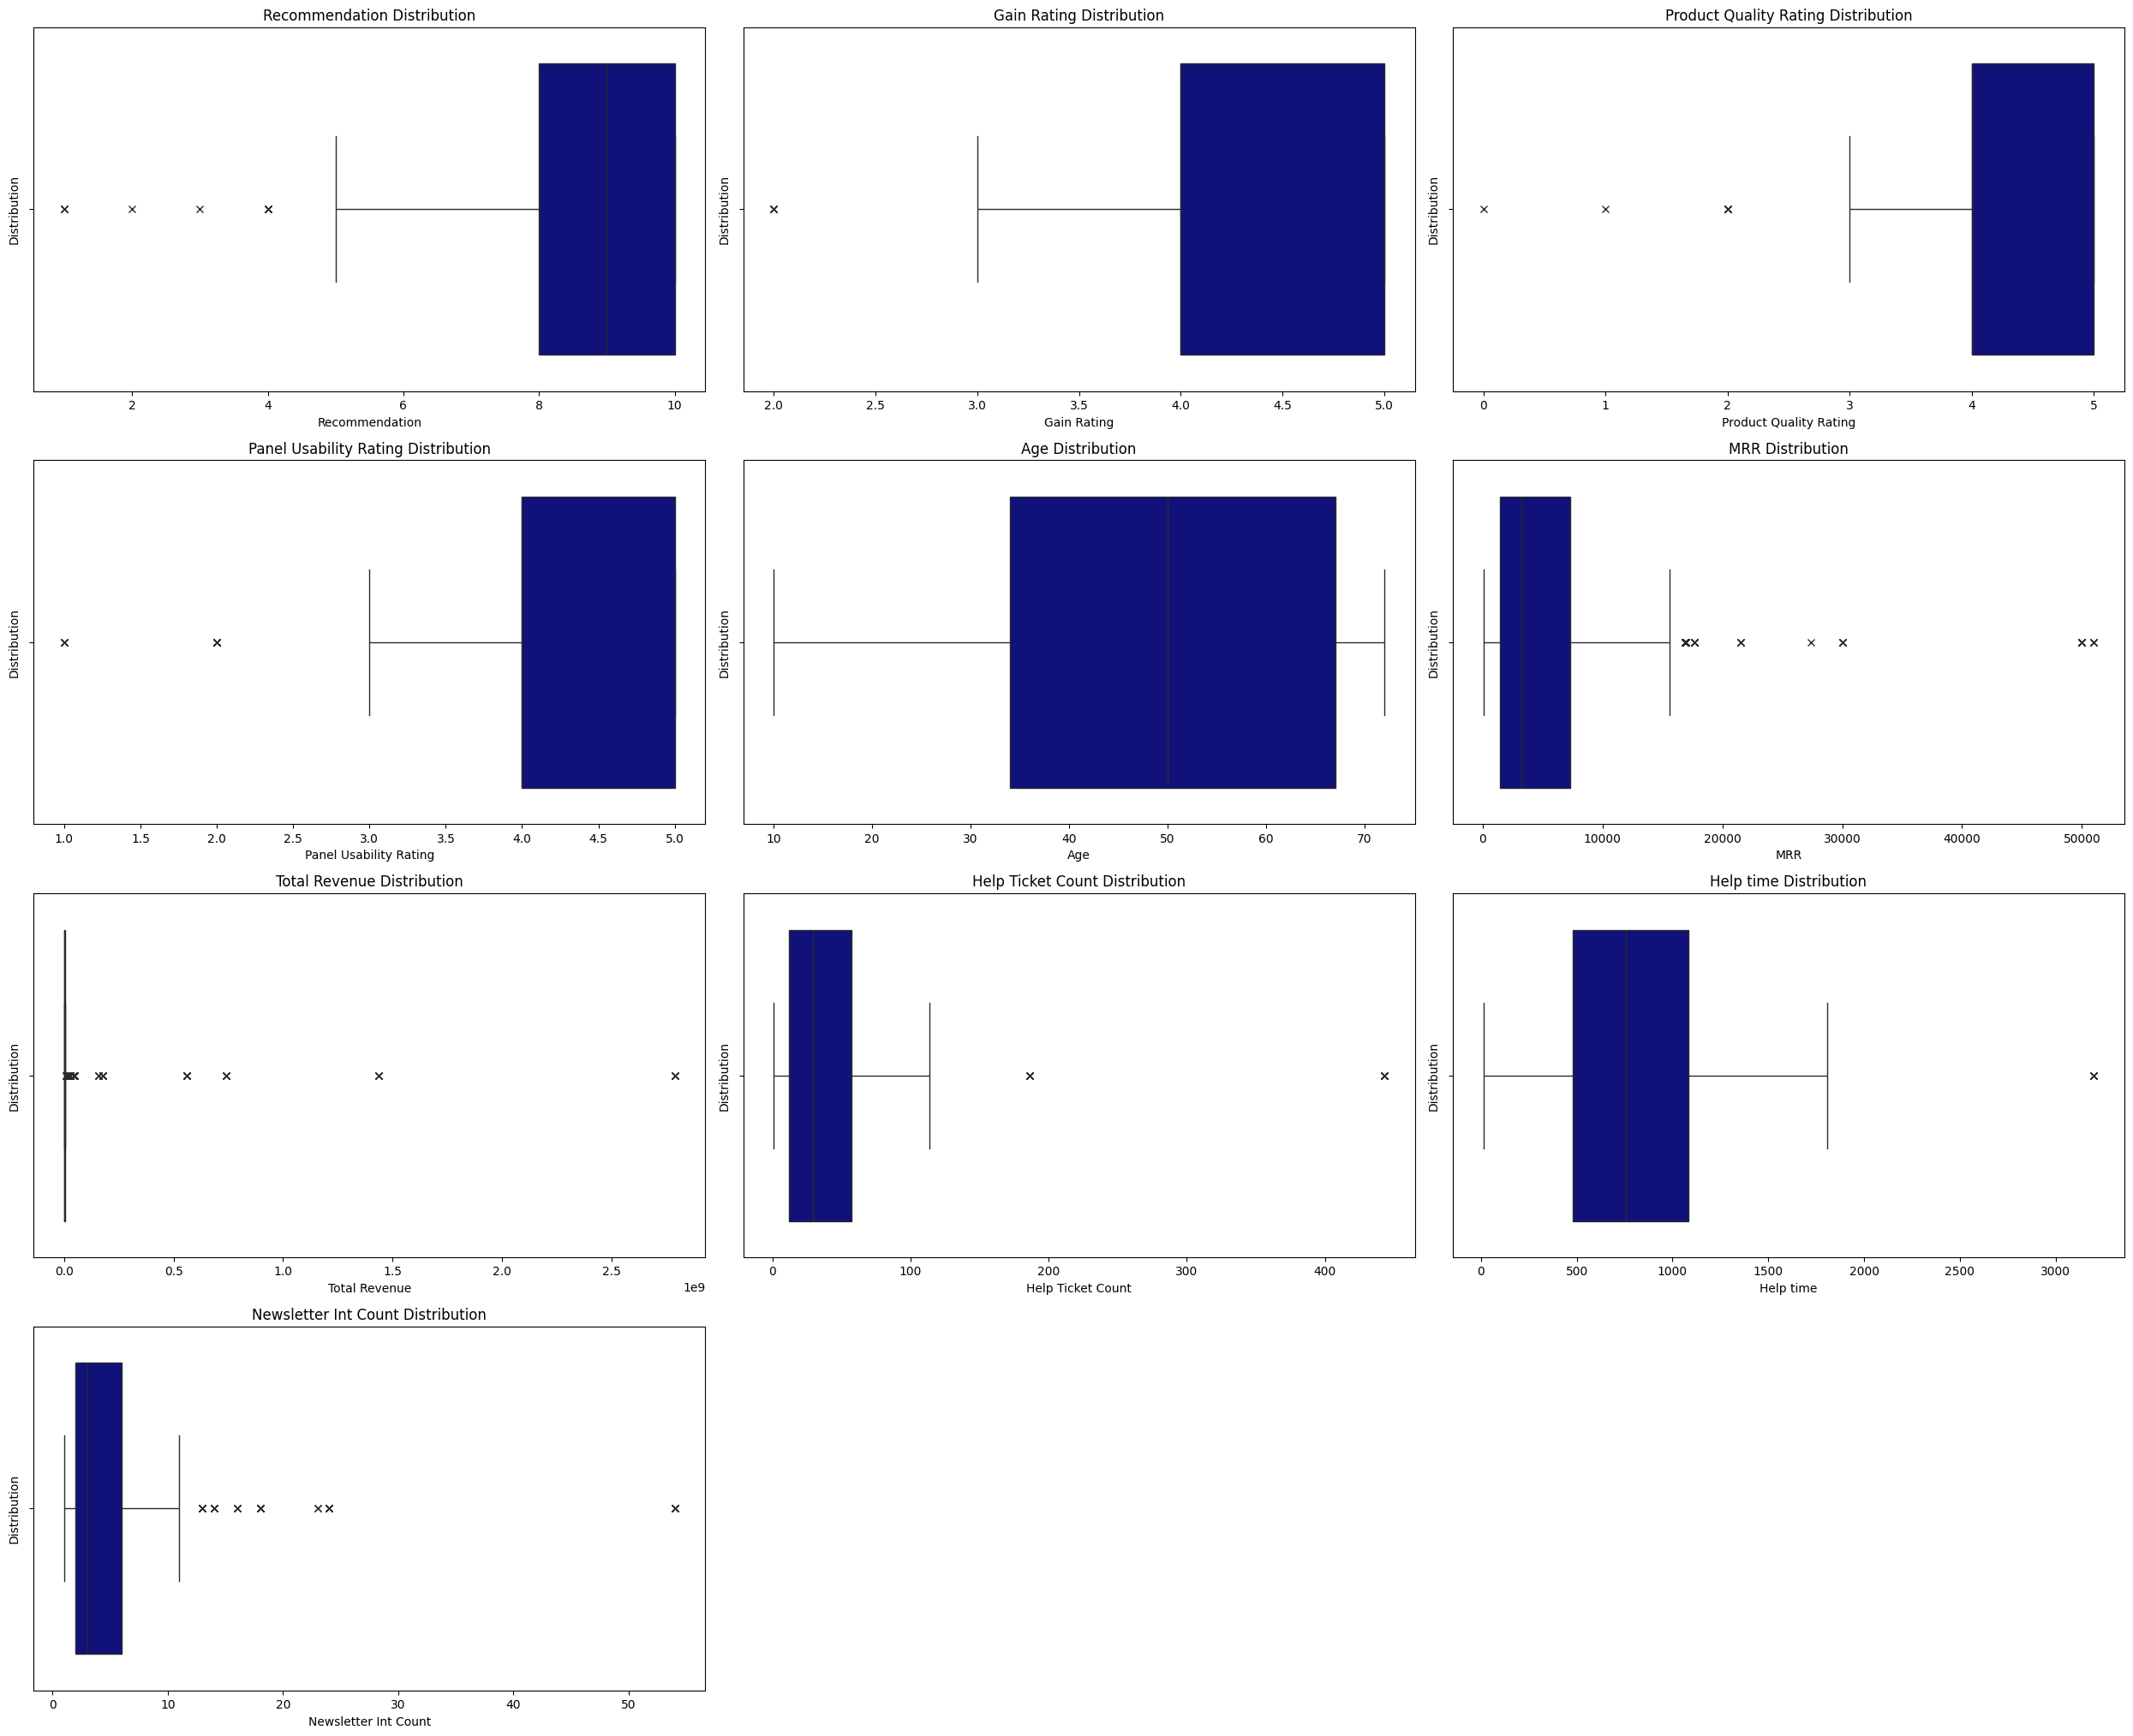

In [10]:
# Outliers boxplot
fig = plt.figure(figsize=(25, 25))
for i, col in enumerate(df_num.columns):
    ax = fig.add_subplot(5, 3, i+1)
    sns.boxplot(x = df_num[col].ffill(), 
                color='darkblue',
                flierprops={"marker": "x"})
    ax.set_title(col + " Distribution", color='k')
    plt.ylabel('Distribution')
fig.tight_layout()

In [11]:
# remove outliers with np.abs
#from scipy import stats
#df_num = df_num[(np.abs(stats.zscore(df_num)) < 3).all(axis=1)]

# shape 
#df_num.shape

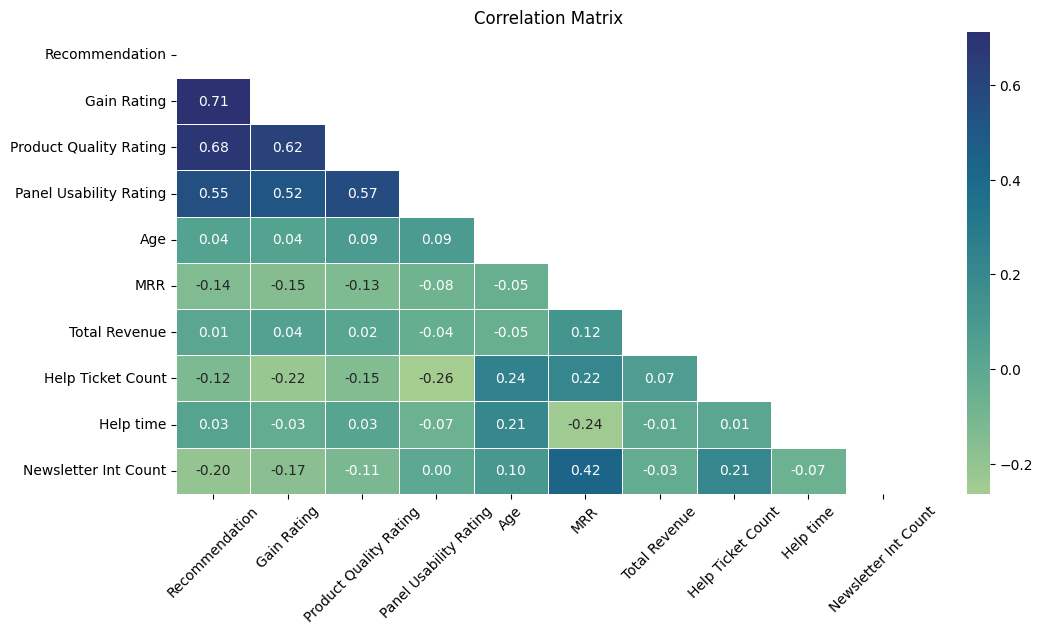

In [12]:
# correlation matrix
def sketch_corr(df):
    plt.figure(figsize=(12,6))
    mask = np.triu(df.corr(numeric_only=True))
    corr_matrix = df.corr(numeric_only=True)
    sns.heatmap(corr_matrix, 
                annot=True, 
                mask = mask, 
                cmap='crest', 
                fmt=".2f",
                linewidths=.5)
    plt.title('Correlation Matrix')
    plt.xticks(rotation=45)
    plt.show()

sketch_corr(df)


Use Frequent
Once a Day      196
Once a Week     105
Once a Month     51
Name: count, dtype: int64


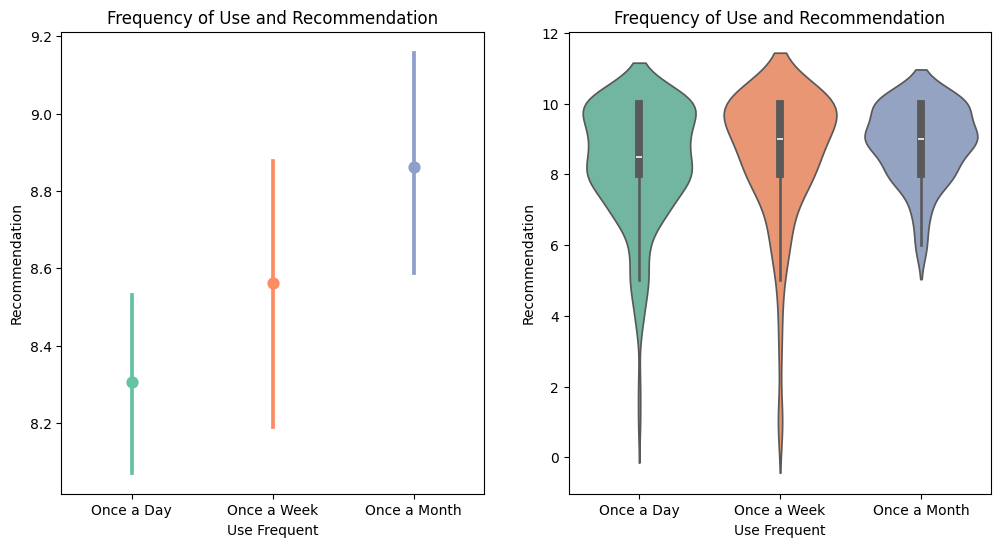

In [13]:
df['Use Frequent'].unique()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].set_title('Frequency of Use and Recommendation')
axes[1].set_title('Frequency of Use and Recommendation')

df_reco_model = df.copy()
df_reco_model = df[~df[['Use Frequent', 'Recommendation']].isna().any(axis=1)]

# Pointplot
sns.pointplot(x="Use Frequent", 
            y="Recommendation", 
            data=df_reco_model,
            ax=axes[0],
            hue='Use Frequent',
            palette='Set2')

#Violinplot
sns.violinplot(x="Use Frequent", 
            y="Recommendation", 
            data=df_reco_model,
            ax=axes[1],
            inner='box',
            hue='Use Frequent',
            palette='Set2')

print(df['Use Frequent'].value_counts())

plt.show()


In [14]:
df_reco_model['Report Understanding'].unique()
print(df_reco_model['Report Understanding'].value_counts())

Report Understanding
I need someone from Insider team to provide me the report from the panel    112
I am able to report everything easily                                       100
I tried but could not find everything I need                                 66
I don't use it often                                                         42
I can pull all the numbers, but don't understand them                        32
Name: count, dtype: int64


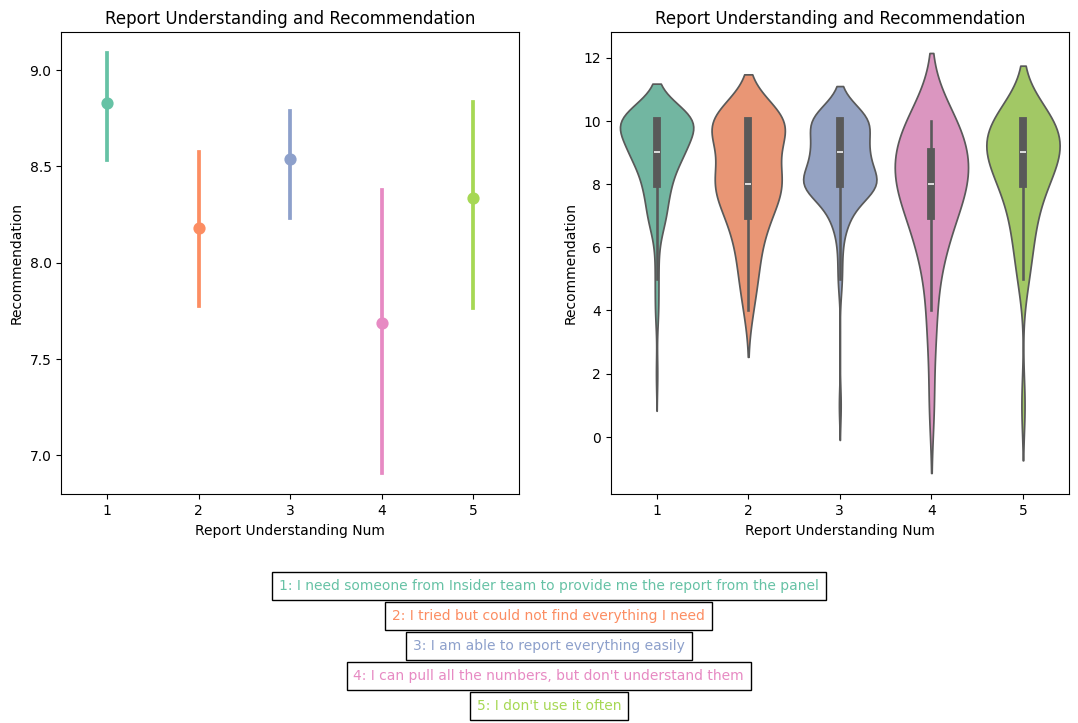

In [15]:
# Report Understanding vs Recommendation

category_mapping = {
    "I need someone from Insider team to provide me the report from the panel": "1",
    "I tried but could not find everything I need": "2",
    "I am able to report everything easily": "3",
    "I can pull all the numbers, but don't understand them": "4",
    "I don't use it often": "5"
}

df_reco_model = df[~df[['Report Understanding', 'Recommendation']].isna().any(axis=1)]
df_reco_model["Report Understanding Num"] = df_reco_model["Report Understanding"].map(category_mapping)


fig, axes = plt.subplots(1, 2, figsize=(13, 6))
axes[0].set_title('Report Understanding and Recommendation')
axes[1].set_title('Report Understanding and Recommendation')

# Pointplot
sns.pointplot(x="Report Understanding Num", 
            y="Recommendation", 
            data=df_reco_model,
            ax=axes[0],
            hue='Report Understanding Num',
            palette='Set2')

#Violinplot
sns.violinplot(x="Report Understanding Num", 
            y="Recommendation", 
            data=df_reco_model,
            ax=axes[1],
            inner='box',
            hue='Report Understanding Num',
            palette='Set2')

colors = sns.color_palette("Set2", n_colors=len(category_mapping))
legend_x, legend_y = 0.5, -0.05 

for i, (desc, num) in enumerate(category_mapping.items()):
    plt.figtext(legend_x, legend_y - (i * 0.05), 
                f"{num}: {desc}", 
                ha="center", fontsize=10, 
                color=colors[i], 
                bbox={"facecolor": "white", "alpha": 1, "pad": 5})
plt.show()


In [16]:
# Clean data: remove special characters and convert to numeric
df['Help Ticket Count'] = df['Help Ticket Count'].astype(float)
df['Recommendation'] = df['Recommendation'].astype(float)
df['Age'] = df['Age'].astype(float)

# Calculate correlations
correlation_age_mrr = df['Age'].corr(df['MRR'])
correlation_age_revenue = df['Age'].corr(df['Total Revenue'])
correlation_ticket_mrr = df['Help Ticket Count'].corr(df['MRR'])
correlation_ticket_revenue = df['Help Ticket Count'].corr(df['Total Revenue'])
correlation_csat_mrr = df['Recommendation'].corr(df['MRR'])
correlation_csat_revenue = df['Recommendation'].corr(df['Total Revenue'])

# Print correlation results
print(f"Correlation between Customer Age and MRR: {correlation_age_mrr}")
print(f"Correlation between Customer Age and Total Revenue: {correlation_age_revenue}")
print(f"Correlation between Help Tickets and MRR: {correlation_ticket_mrr}")
print(f"Correlation between Help Tickets and Total Revenue: {correlation_ticket_revenue}")
print(f"Correlation between CSAT Score and MRR: {correlation_csat_mrr}")
print(f"Correlation between CSAT Score and Total Revenue: {correlation_csat_revenue}")

Correlation between Customer Age and MRR: -0.0479009728084891
Correlation between Customer Age and Total Revenue: -0.050162244827342835
Correlation between Help Tickets and MRR: 0.21610225147647968
Correlation between Help Tickets and Total Revenue: 0.07131154681660958
Correlation between CSAT Score and MRR: -0.13598052867287164
Correlation between CSAT Score and Total Revenue: 0.008210544415510343


In [17]:
df[df['Recommendation'] < 3]

,Customer ID,Survey Date,Response Date,Recommendation,Gain Rating,Use Frequent,Product Quality Rating,Panel Usability Rating,Report Understanding,Age,MRR,Total Revenue,Help Ticket Count,Help time,Newsletter Int Count,Region,Vertical,Subvertical,Status,Customer Level
1143,160000,2022-01-01,2022-02-01,1.0,2,Once a Day,2,2.0,I am able to report everything easily,72.0,1371.0,560677689.0,66.0,772.0,6.0,Turkey,Retail,Consumer Electronics,Retained,Semi-Enterprise
1486,1206050,2022-07-01,2022-07-05,1.0,2,Once a Week,3,1.0,I don't use it often,33.0,1486.0,100256.0,13.0,1349.0,3.0,Turkey,Retail,Consumer Electronics,Retained,Enterprise
1511,859900,2022-07-01,2022-07-07,1.0,4,Once a Week,1,3.0,"I can pull all the numbers, but don't understa...",39.0,1522.0,722243.0,22.0,1236.0,4.0,Malaysia,Retail,Gifts,Retained,Long-tail
1670,156950,2022-07-01,2022-08-05,2.0,3,Once a Day,3,1.0,I need someone from Insider team to provide me...,72.0,1300.0,287688.0,11.0,1771.0,1.0,Turkey,Retail,Sports,Retained,Enterprise
